In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy
from rtbm import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

RTBM_precision= 1e-5

# Example 1: Sine-Mixture with gaussian noise

In [ ]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example: Intrawave modulation

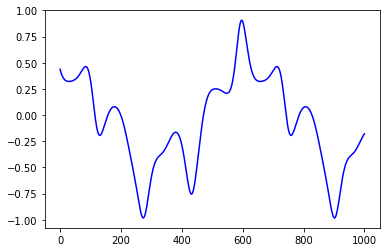

In [2]:
def func(x,n):
    return np.cos(0.01*x+0.5*np.cos(0.05*x))/(2+np.sin(0.04*x))

X = np.linspace(0, 1000, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"b-")

In [3]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,5))
M.add(layers.DiagExpectationUnitLayer(5,5))
M.add(layers.DiagExpectationUnitLayer(5,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, tolfun=1e-5)

CMA on 16 cpu(s) enabled
(8_w,16)-aCMA-ES (mu_w=4.8,w_1=32%) in dimension 76 (seed=494485, Mon Oct 30 16:09:38 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     16 2.292623385208407e+00 1.0e+00 9.54e-01  1e+00  1e+00 0:01.3
    2     32 2.466817024483731e-01 1.0e+00 9.19e-01  9e-01  9e-01 0:02.6
    3     48 7.728568143278564e+00 1.0e+00 8.95e-01  9e-01  9e-01 0:03.9
    6     96 9.278872278610700e-01 1.0e+00 8.41e-01  8e-01  8e-01 0:07.8
   10    160 1.463247922109253e+00 1.1e+00 8.24e-01  8e-01  8e-01 0:12.9
   14    224 1.073375408179782e+00 1.1e+00 8.01e-01  8e-01  8e-01 0:18.1
   19    304 5.543537930429302e-01 1.1e+00 7.51e-01  7e-01  8e-01 0:24.6
   25    400 8.668674283329691e+00 1.2e+00 7.24e-01  7e-01  7e-01 0:32.3
   32    512 9.687095161985010e-02 1.2e+00 7.26e-01  7e-01  7e-01 0:41.4
   40    640 1.026254186507572e+01 1.3e+00 7.60e-01  7e-01  8e-01 0:51.6
   48    768 9.452487833284408e-02 1.3e+00 7.10e-01  7e-01  7e-01 1:02.0
   57   

 3500  56000 8.083028947951562e-02 1.1e+01 2.13e-02  7e-03  3e-02 75:10.0
 3584  57344 8.085625194347287e-02 1.1e+01 2.15e-02  7e-03  3e-02 76:57.8
 3600  57600 8.101366012461372e-02 1.1e+01 2.04e-02  7e-03  2e-02 77:18.5
 3685  58960 8.077801812031084e-02 1.1e+01 1.52e-02  5e-03  2e-02 79:07.9
 3700  59200 8.078421287894157e-02 1.2e+01 1.50e-02  5e-03  2e-02 79:27.3
 3787  60592 8.081225382921940e-02 1.3e+01 1.60e-02  5e-03  2e-02 81:19.4
 3800  60800 8.081158011742624e-02 1.3e+01 1.70e-02  5e-03  2e-02 81:36.2
 3888  62208 8.082478764569188e-02 1.3e+01 1.74e-02  5e-03  2e-02 83:29.4
 3900  62400 8.081655756052095e-02 1.3e+01 1.70e-02  5e-03  2e-02 83:44.8
 3990  63840 8.080608725052686e-02 1.4e+01 1.76e-02  5e-03  2e-02 85:40.6
 4000  64000 8.088855889391929e-02 1.4e+01 1.84e-02  5e-03  2e-02 85:53.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
 4091  65456 8.090065772494472e-02 1.5e+01 2.01e-02  6e-03  3e-02 87:50.8
 4100  65600 8.084386331699443e-02 1.5e+

In [ ]:
npoints = 1000
test_X = (np.linspace(0, 1000, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,100))
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, maxiter=100)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.xaxis("t")
plt.yaxis("y(t)")
plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [ ]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [ ]:
M = mdl.Model()
#M.add(layers.Linear(784,1,paramBound=100))
M.add(layers.DiagExpectationUnitLayer(784,1,Qmax=5,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(784,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(25,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(10,1))
#M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#T=enc.transform(Y_train)


In [ ]:
minim = minimizer.CMA(True)

sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_train))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_test))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))